In [1]:

import gc
gc.collect()
# install tensorflow 2.4.1
#install librosa

import tfcgang as tfg
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from datetime import datetime
from matplotlib import colors


dirc  =  "/home/reza/Desktop/dd/NN/Generator_Model"


Model =  tfg.TFCGAN(dirc, scalemin = -10,
                    scalemax = 2.5485036, pwr = 1,
                    noise = 100, mtype = 0)

mode  =  "ADMM"

di = 1
rho = 1e-10
eps=1e-12
ab = 2


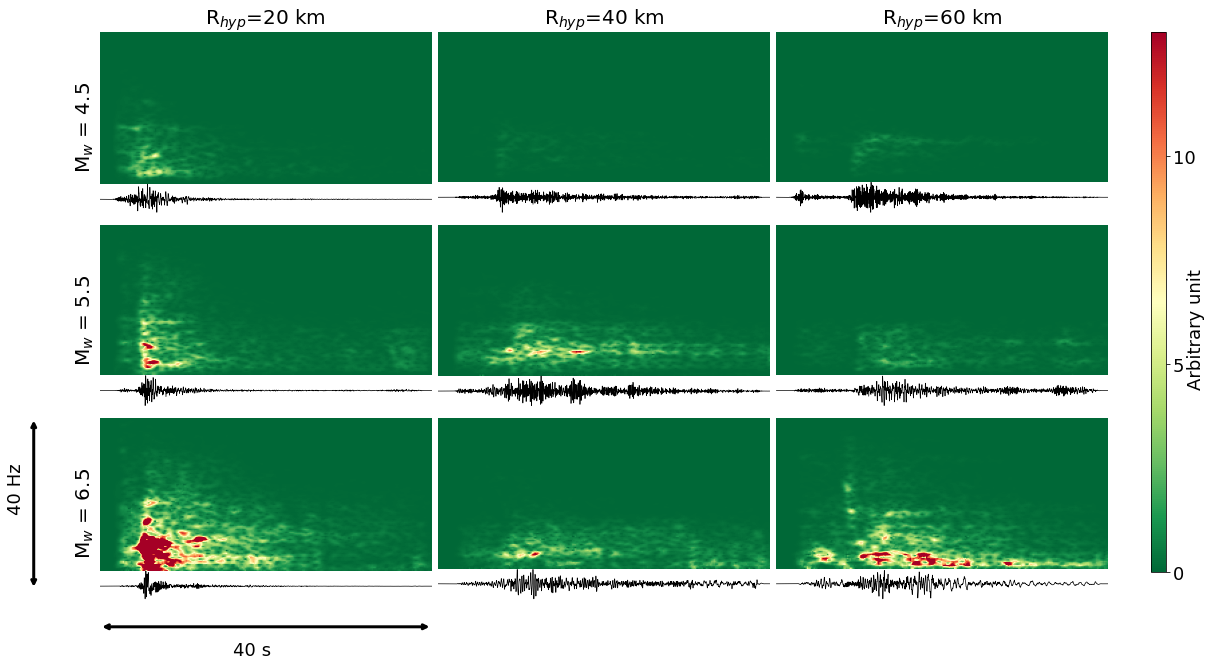

In [7]:


mag = [4.5, 5.5, 6.5]
dis = [20, 40, 60]

fig, axes = plt.subplots(3, 3, figsize =(20,10))

ngen = 1
fnt = 18

MODE = "ADMM"

for i in range(len(mag)):
    axy = axes[i]
    for ii in range(len(dis)):
        axx = axy[ii]
        axx.set_yticks([])
        axx.set_xticks([])
        
        axx.set(frame_on=False)
        
        tx, freq , FAS, Spec, x = Model.Maker(mag[i]/1, dis[ii]/di
                                              , 400*1, ngen, PRint = 20,   
                                          mode = mode, rho = rho, eps = eps, ab = ab)

        im1 = axx.imshow((Spec[0][-20::-1,:])/1,aspect='auto', cmap='RdYlGn_r',clim=[0,13],  extent = [0,1, 0, 1],)
        
        if (i == 2) and (ii == 0):
            im2 = im1
            nmax = np.max(Spec[0][-20::-1,:])
            nmin = np.min(Spec[0][-20::-1,:])
        axx.plot(tx/np.max(tx), ((x)/ (np.max(np.abs(x))*10))-0.1 , 'k', lw = 0.7)
        
axes[0][0].set_title("R$_{hyp}$=" + str(dis[0])+" km", fontsize=fnt+2)
axes[0][1].set_title("R$_{hyp}$=" + str(dis[1])+" km", fontsize=fnt+2)
axes[0][2].set_title("R$_{hyp}$=" + str(dis[2])+" km", fontsize=fnt+2)


axes[0][0].set_ylabel("M$_{w}$ = "+ str(mag[0]), fontsize=fnt+2)
axes[1][0].set_ylabel("M$_{w}$ = "+ str(mag[1]), fontsize=fnt+2)
axes[2][0].set_ylabel("M$_{w}$ = "+ str(mag[2]), fontsize=fnt+2)


axx = axes[2,0]

axx.annotate('', xy=(0, -0.1), xycoords='axes fraction', xytext=(1, -0.1),
             arrowprops=dict(arrowstyle="<->", color='k', lw =3))

axx.annotate('', xy=(-0.2, 0.1), xycoords='axes fraction', xytext=(-0.2, 1),
             arrowprops=dict(arrowstyle="<->", color='k', lw =3))

axx.text(0.4,-0.55, '40 s', fontsize =fnt)


axx.text(-0.28,0.4, '40 Hz', rotation=90, fontsize = fnt)


fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, 
                    wspace=0.02, hspace=0.02)

cb_ax = fig.add_axes([0.83, 0.15, 0.01, 0.75])


cbar = fig.colorbar(im2, cax=cb_ax)


cbar.set_ticks([0,5, 10])


cb_ax.tick_params(labelsize=fnt)
cb_ax.text(32 , 4.5, "Arbitrary unit", rotation = 90, fontsize = fnt)

plt.savefig("Figure05_2.pdf", dpi = 500,bbox_inches='tight')
